## Pixel level transformation with Pillow 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#### Load an image

We can use the Pillow library to load an image and convert it in the different color spaces

In [2]:
impath = 'images/segment-12321865437129862911_3480_000_3500_000_with_camera_labels_2.png'

In [3]:
img = Image.open(impath)

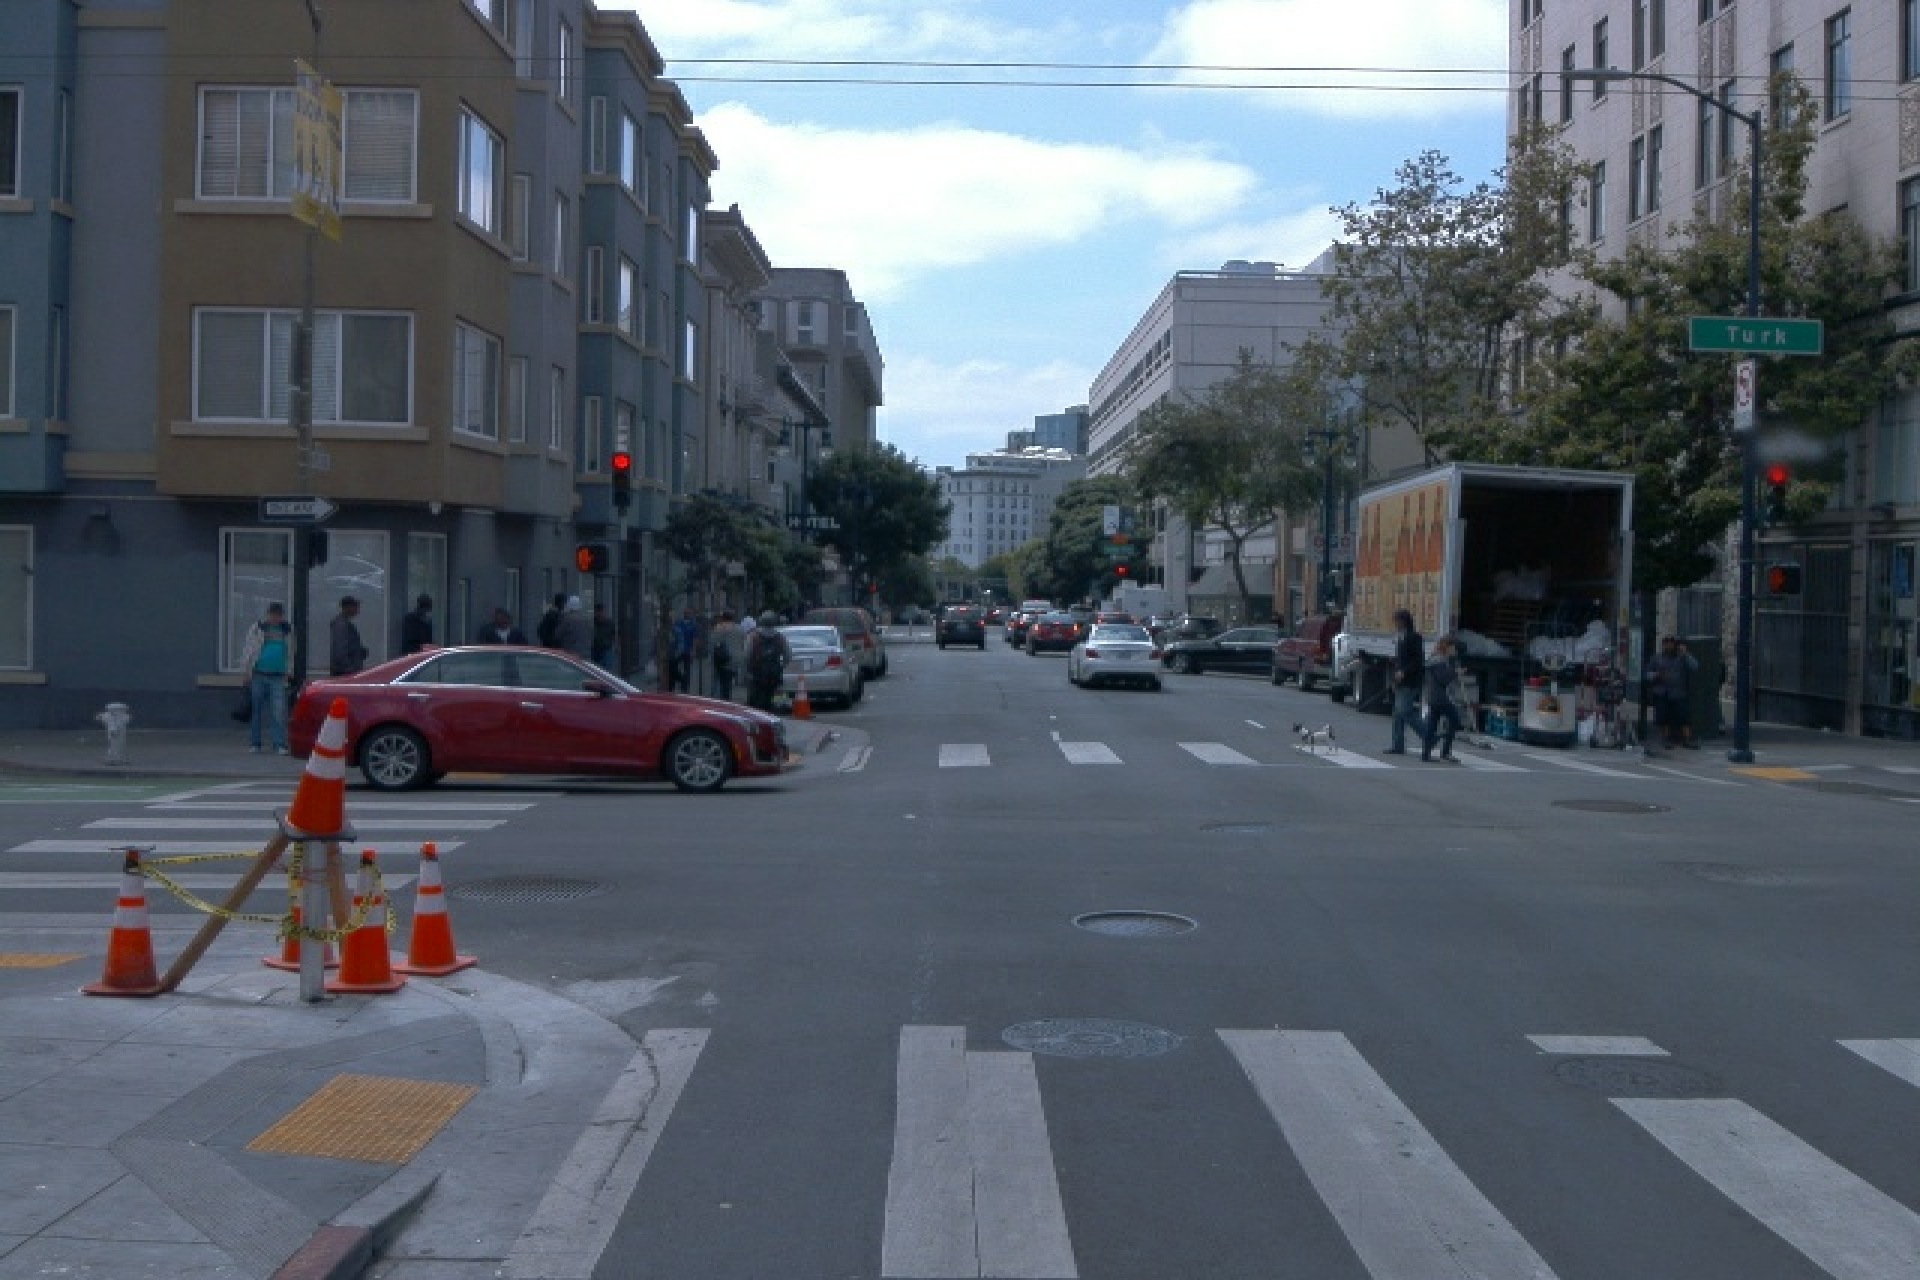

In [4]:
img

A Pillow image has several attribute, such as size, name or mode

In [5]:
print(f'Our image is a {img.mode} image, of dimensions {img.size} and located at {img.filename}')

Our image is a RGB image, of dimensions (1920, 1280) and located at images/segment-12321865437129862911_3480_000_3500_000_with_camera_labels_2.png


In [6]:
img_rgb = img.convert('RGB')

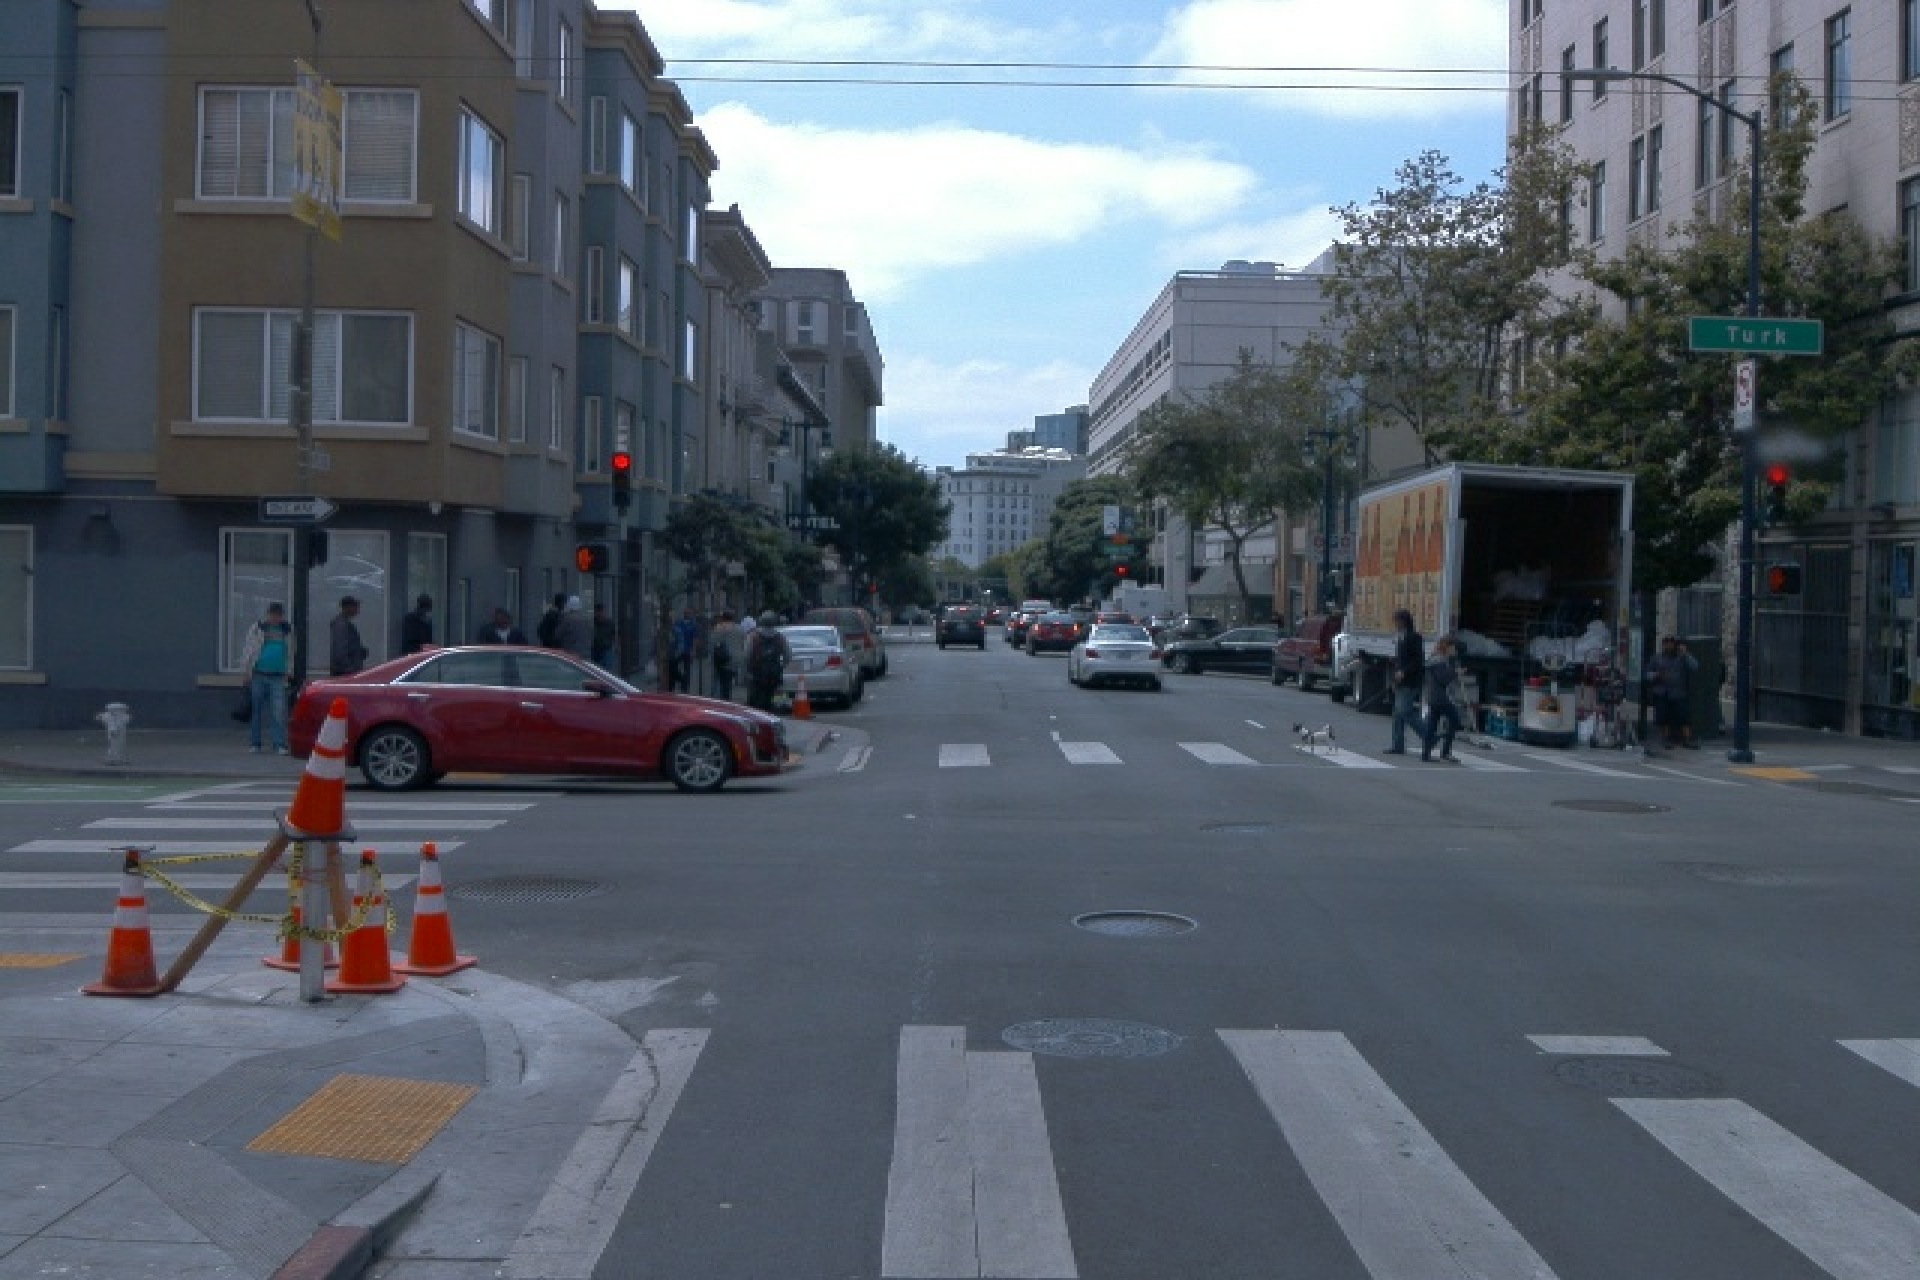

In [7]:
img_rgb

#### Convert an image

Once the image is loaded, we can convert it between different color spaces.

In [8]:
# convert to grayscale
img_gray = img.convert('L')

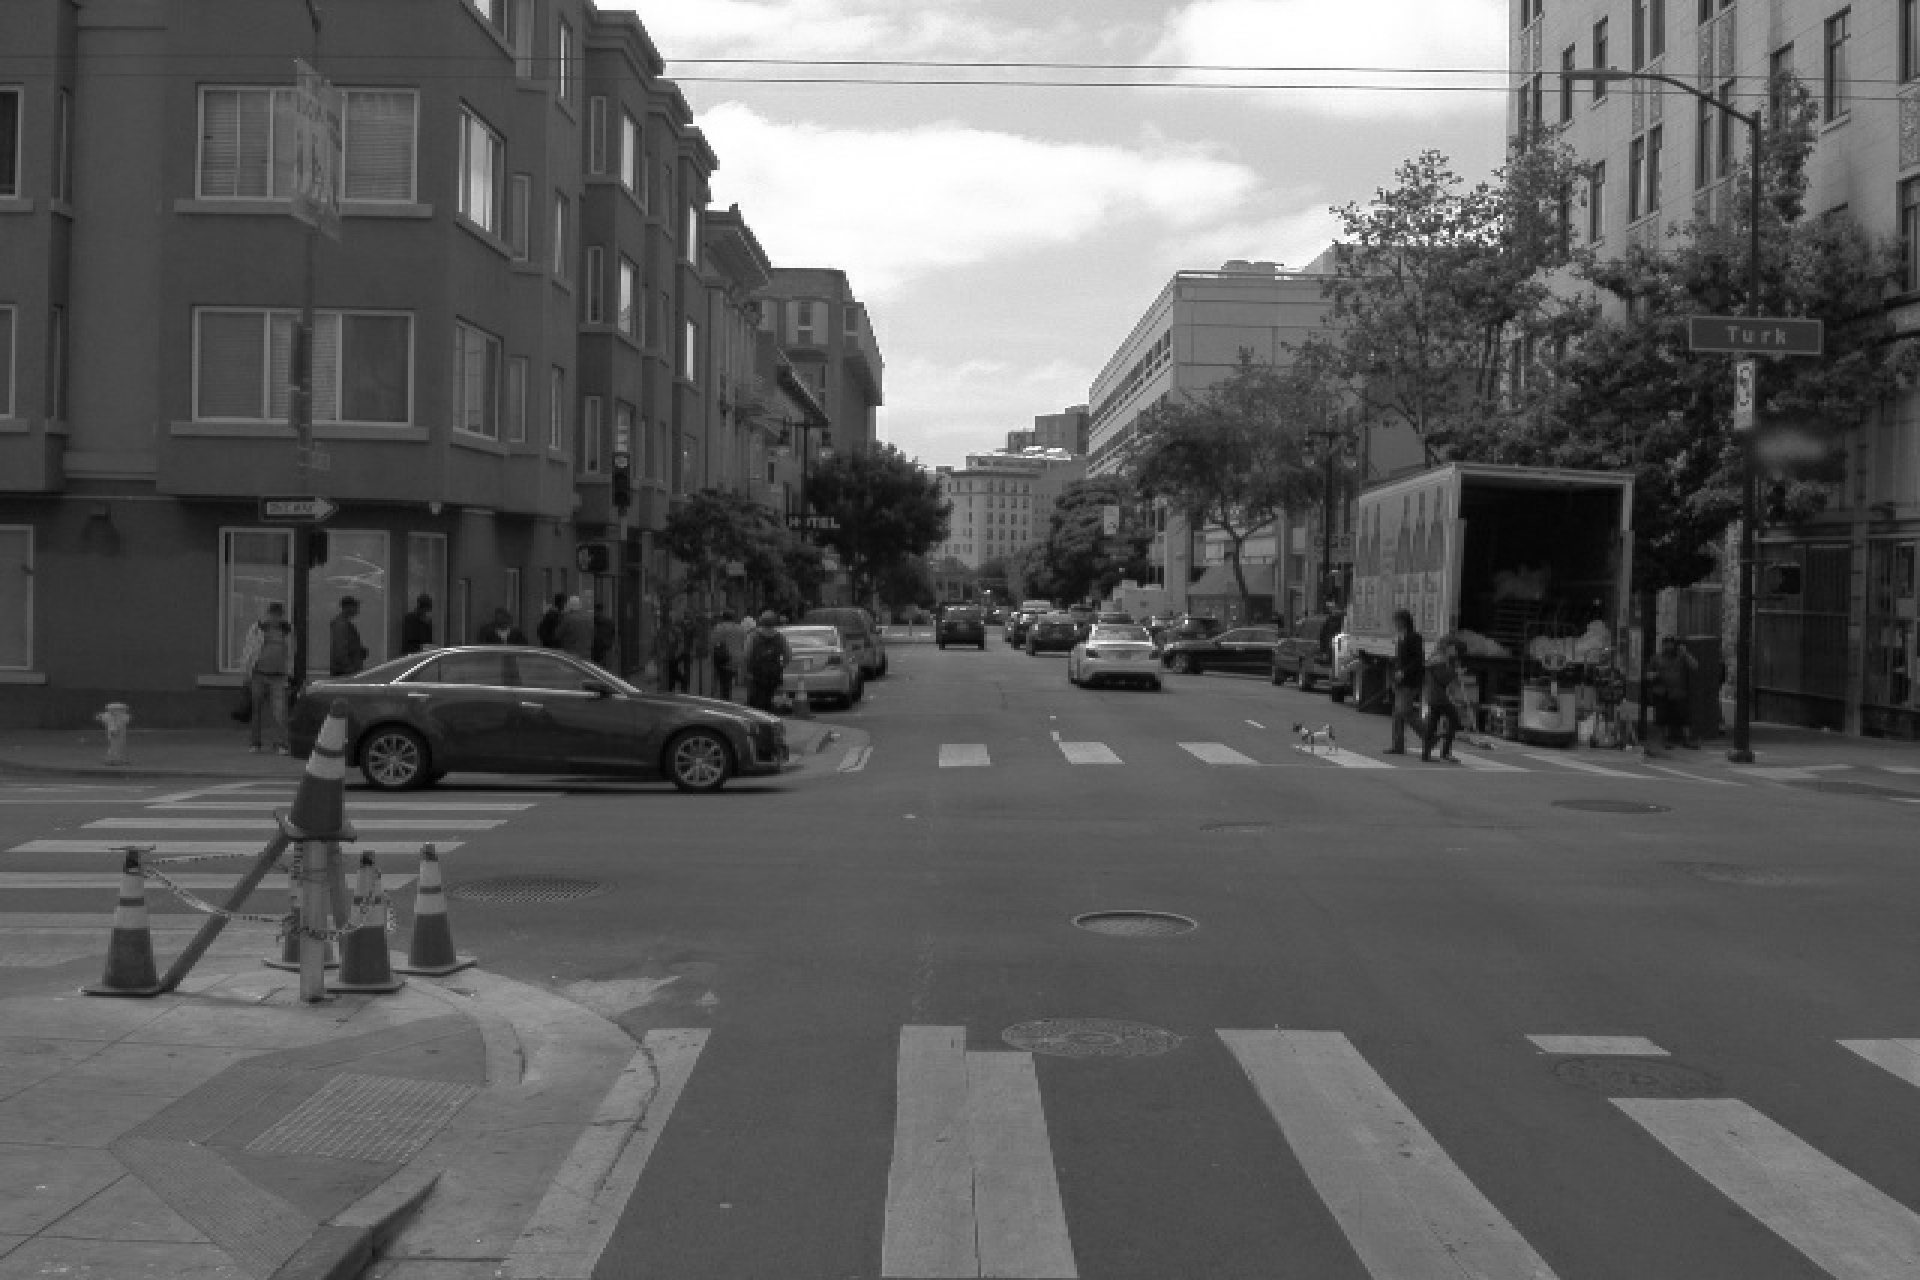

In [9]:
img_gray

In [10]:
# convert to hsv. PNG does not support HSV color model and we cannot display it.
img_hsv = img.convert('HSV')

#### Color thresholding

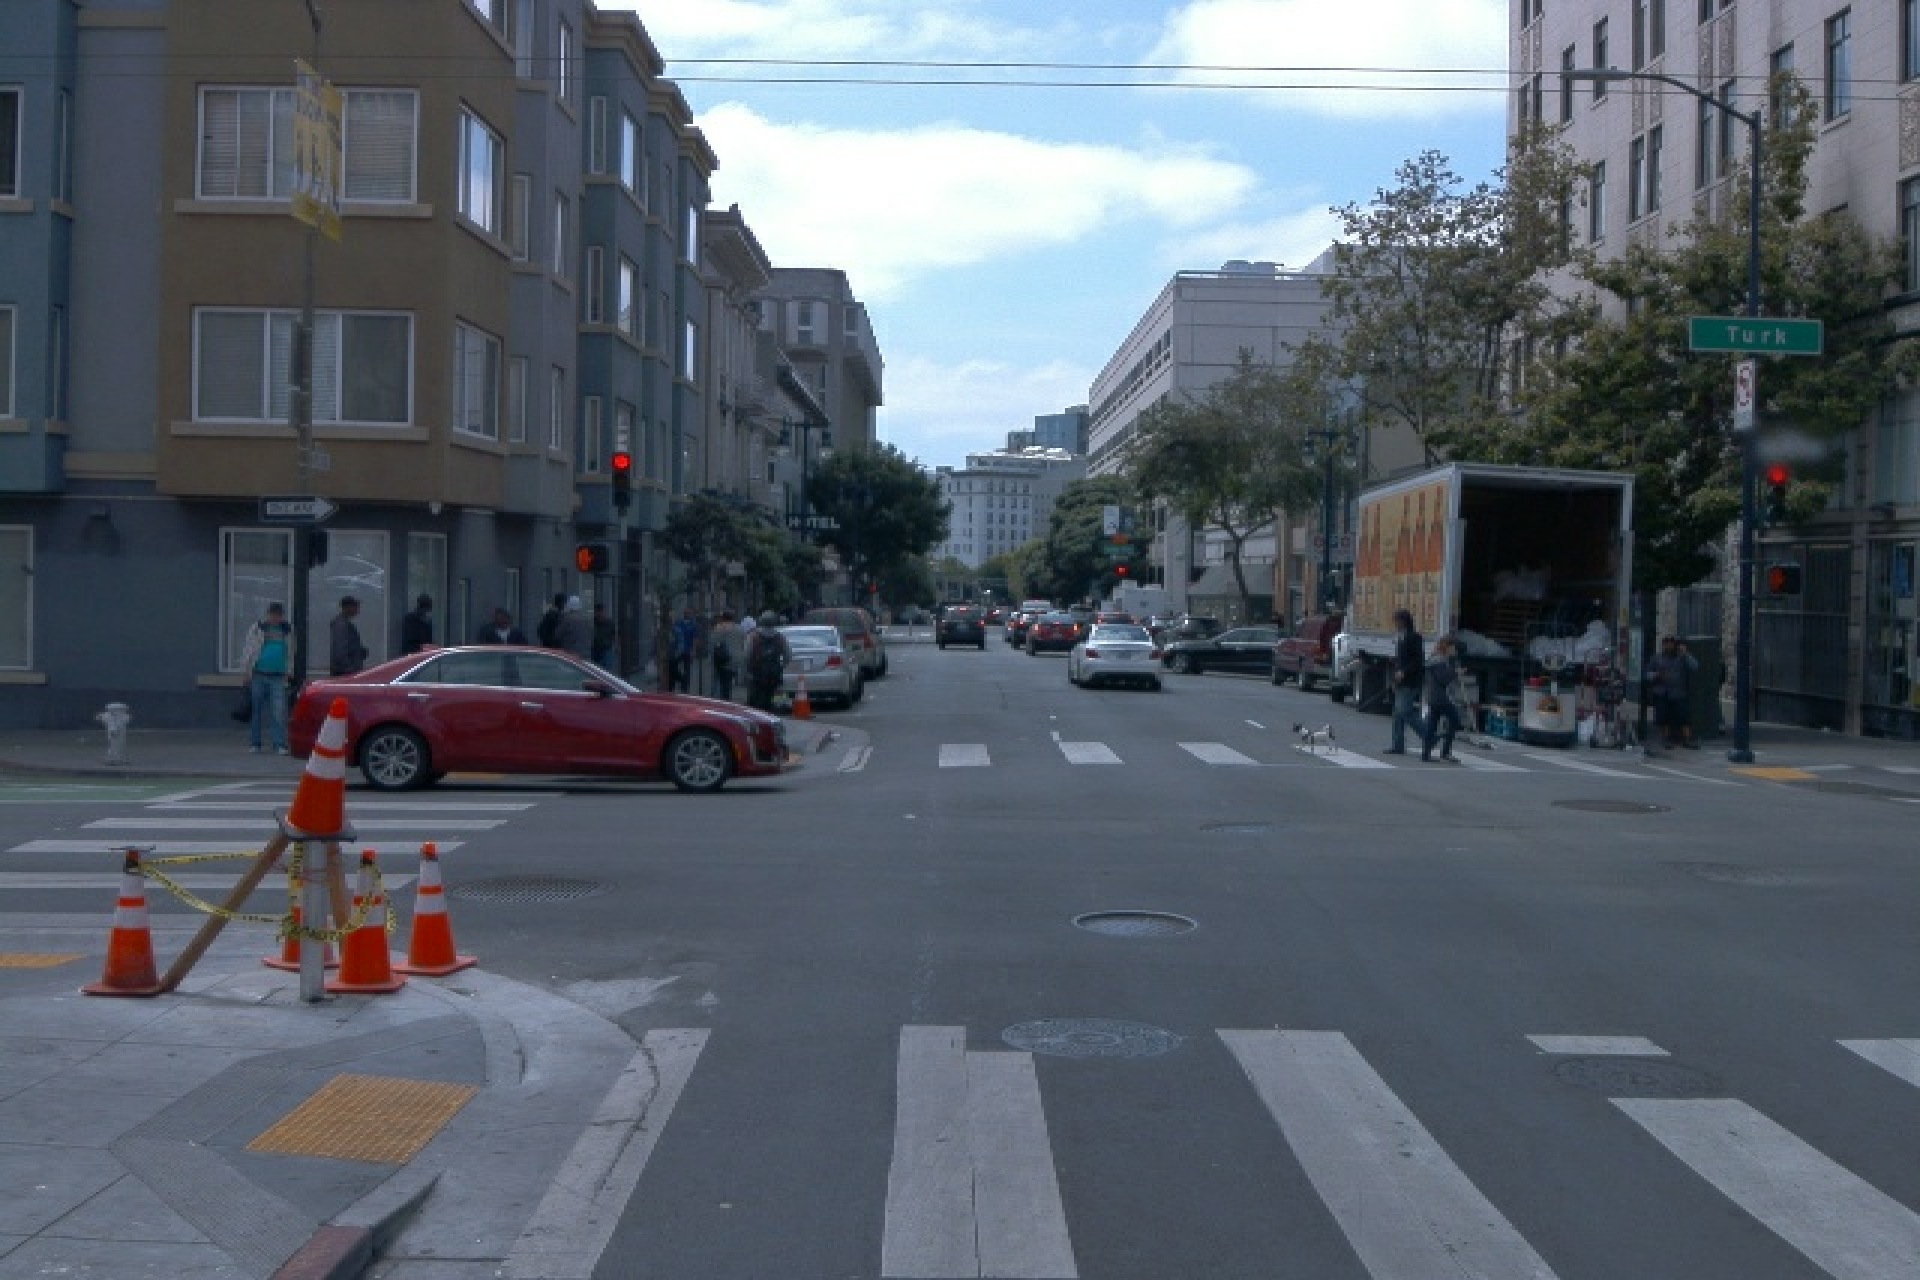

In [11]:
img_rgb

Let's try to mask everything but the red car. We can use the convert hsv image to threshold because it will be easier to isolate colors.

In [12]:
imarr = np.array(img_hsv)

Isolate the hue channel

In [13]:
hue = imarr[..., 0]

Pillow converted HSV image have 3 channels containing 8 bits pixels. Because of that we need to convert the dark red hue (~340) in the same scale. 

In [14]:
red_hue = (hue > 230).astype(np.uint8)

We can use this to mask the rgb image

In [15]:
masked_rgb = np.array(img_rgb * np.stack([red_hue]*3, axis=2))

And we can convert this array back to a Pillow image

In [16]:
# we use this to emphasize the colors and make the object more visibles
masked_rgb *= 2

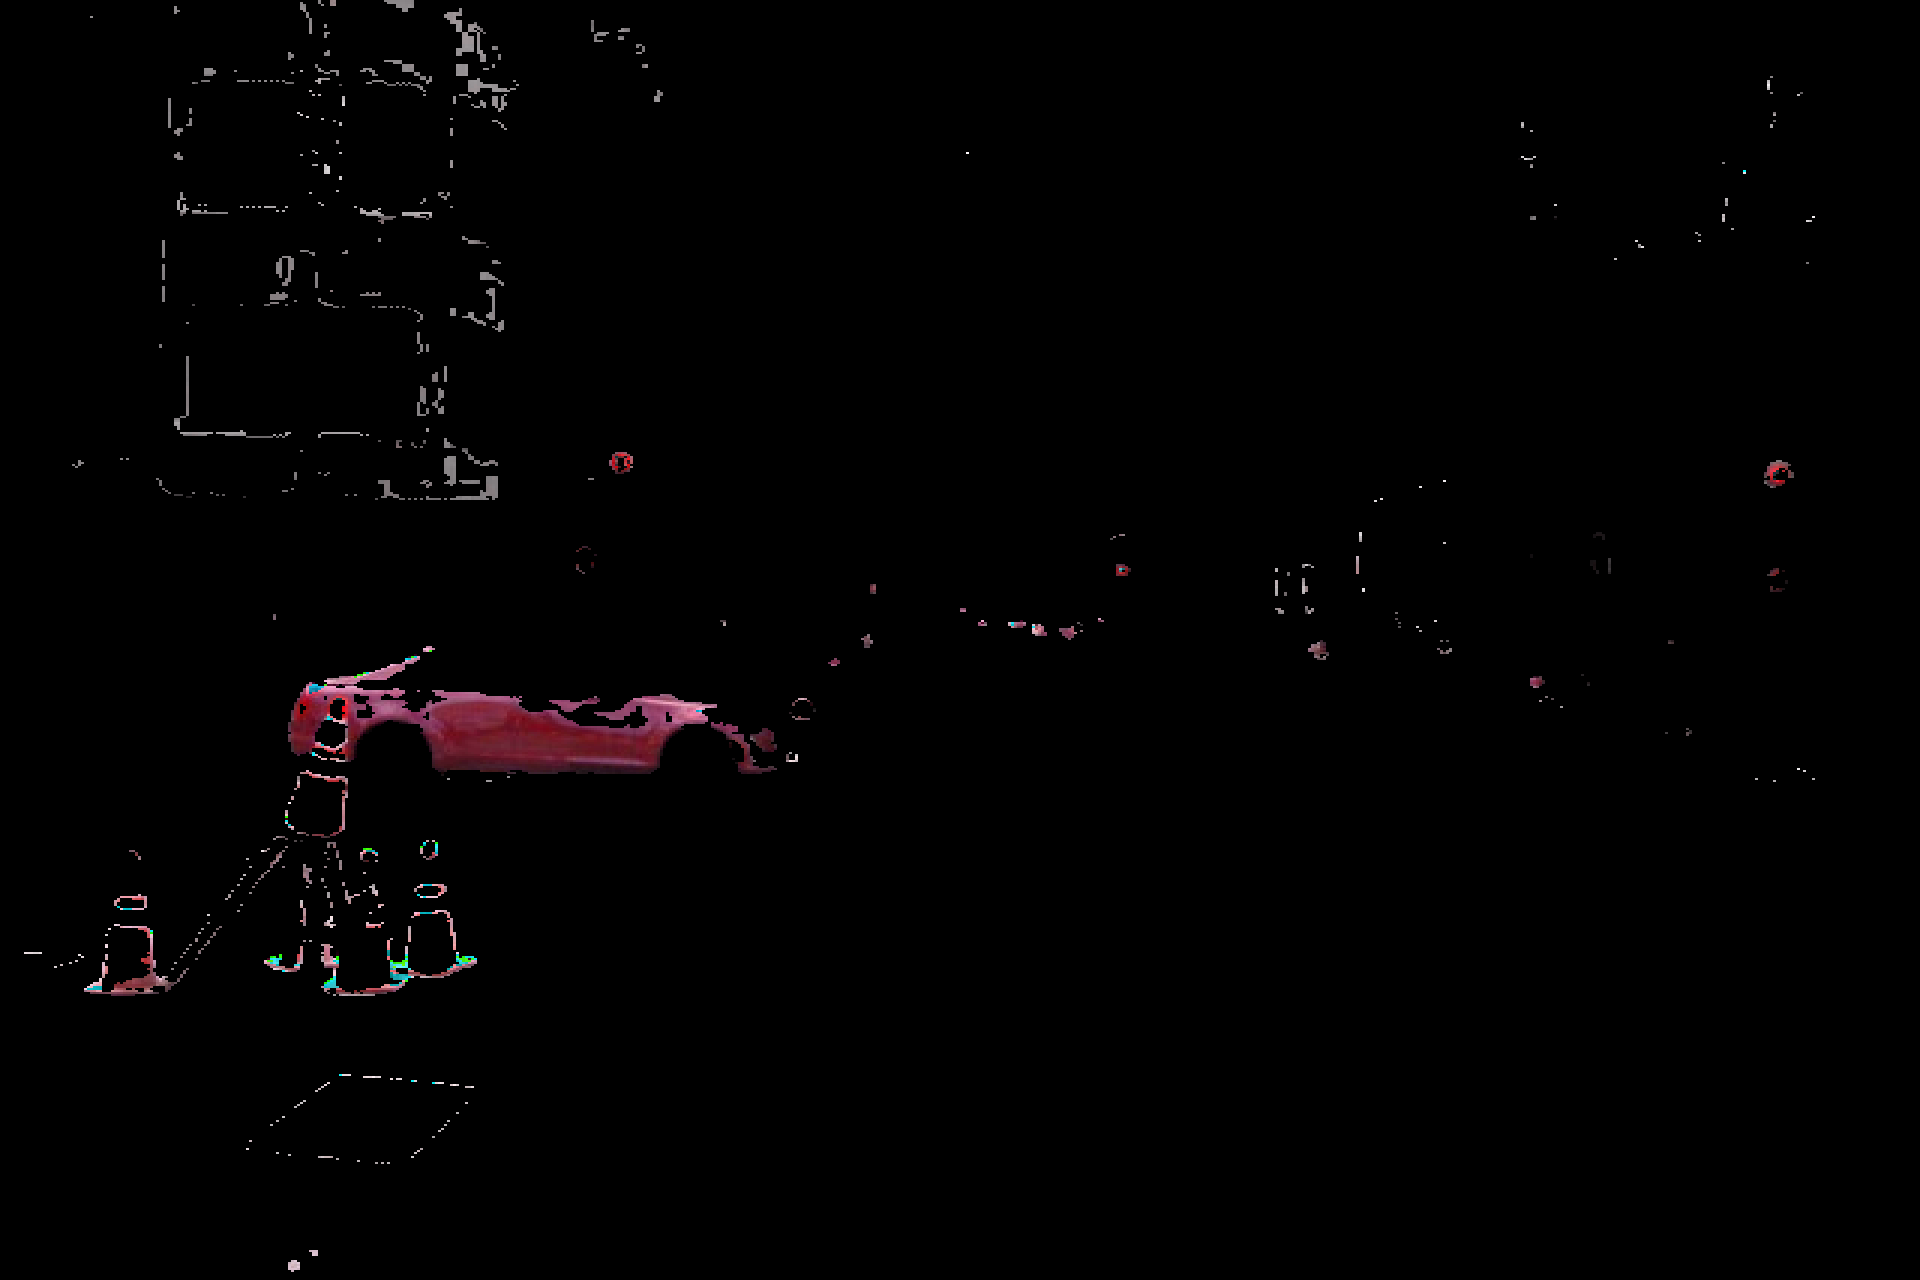

In [17]:
Image.fromarray(masked_rgb)